## Passo 1: forncer um conjunto de dados de preços histórico dos ativos.

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Códidos das ações Empresa 

#### WEGE3, BRFS3, ABEV3, BBAS3, PETR3, VALE3, EQTL3, RENT3, MGLU3, RAIL3, CYRE3, SUZB3, RADL3, VIVT3, ENEV3 

In [2]:
tickers = ['CSNA3.SA', 'HYPE3.SA', 'MGLU3.SA', 'VALE3.SA', 'ITUB3.SA','PETR3.SA','ASAI3.SA','VIVT3.SA','WEGE3.SA','TOTS3.SA']

In [3]:
ohlc = yf.download(tickers, period="max")

[*********************100%***********************]  10 of 10 completed


In [4]:
#Preço diário de fechamento do mercado
preços = ohlc["Adj Close"].dropna(how="all")
preços.tail()

,ASAI3.SA,CSNA3.SA,HYPE3.SA,ITUB3.SA,MGLU3.SA,PETR3.SA,TOTS3.SA,VALE3.SA,VIVT3.SA,WEGE3.SA
Date,,,,,,,,,,
2021-12-23,14.09,24.650000,28.078312,19.270000,6.20,30.440001,28.608072,79.150002,48.487152,33.470001
2021-12-27,13.64,24.920000,28.375122,19.450001,6.78,31.040001,28.677750,78.949997,48.195473,33.169998
2021-12-28,13.10,24.950001,28.741188,19.379999,6.83,31.059999,28.190001,77.050003,47.980000,33.290001
2021-12-29,12.87,25.059999,28.049999,19.309999,6.77,30.930000,27.870001,77.400002,48.400002,32.720001
2021-12-30,12.93,25.150000,28.290001,19.010000,7.24,30.670000,28.610001,78.750000,48.430000,33.090000


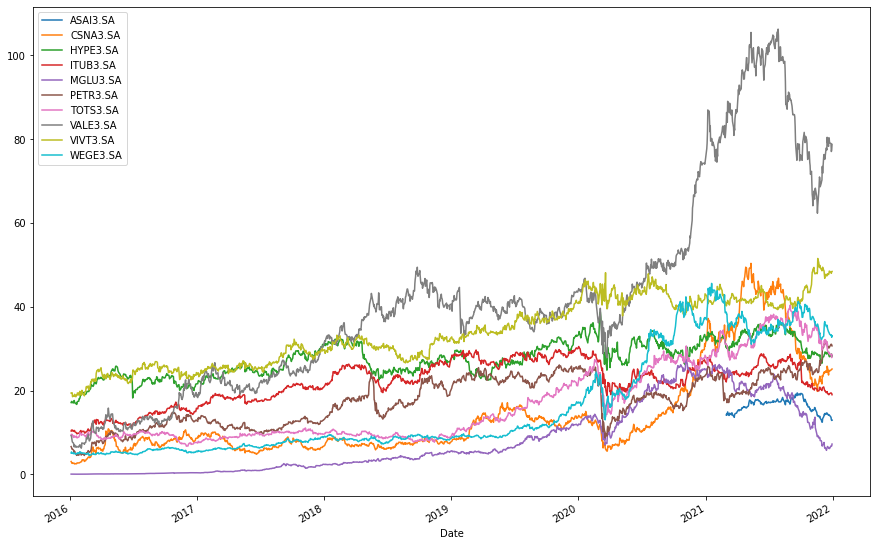

In [5]:
preços[preços.index >= "2016-01-01"].plot(figsize=(15,10));

## Passo 2: Estimando os retornos esperados


In [6]:
import pypfopt
pypfopt.__version__

'1.4.2'

In [7]:
# Retorno Esperado - usando a média histórica
from pypfopt.expected_returns import mean_historical_return
re1= mean_historical_return(preços) #da próxima vez chamar variável de retorno
re1

ASAI3.SA   -0.105961
CSNA3.SA    0.119534
HYPE3.SA    0.113017
ITUB3.SA    0.130213
MGLU3.SA    0.299185
PETR3.SA    0.111940
TOTS3.SA    0.197819
VALE3.SA    0.186748
VIVT3.SA    0.085369
WEGE3.SA    0.290209
dtype: float64

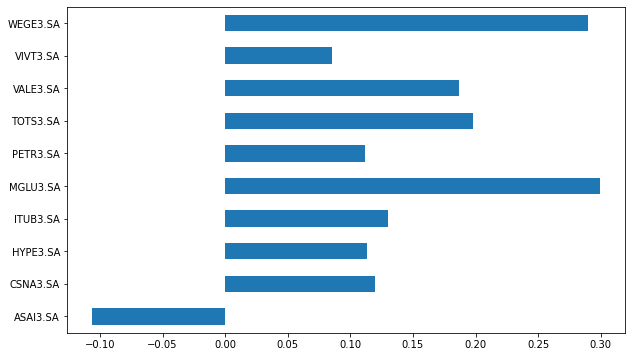

In [8]:
re1.plot.barh(figsize=(10,6));

In [9]:
# Retorno Esperado - calculado pelo CAPM - Ri=Rf+βi(E(Rm)−Rf)
from pypfopt import expected_returns

re2 = expected_returns.capm_return(preços)
re2

ASAI3.SA    0.139950
CSNA3.SA    0.364658
HYPE3.SA    0.222464
ITUB3.SA    0.192810
MGLU3.SA    0.353759
PETR3.SA    0.301097
TOTS3.SA    0.191498
VALE3.SA    0.272712
VIVT3.SA    0.152857
WEGE3.SA    0.162986
Name: mkt, dtype: float64

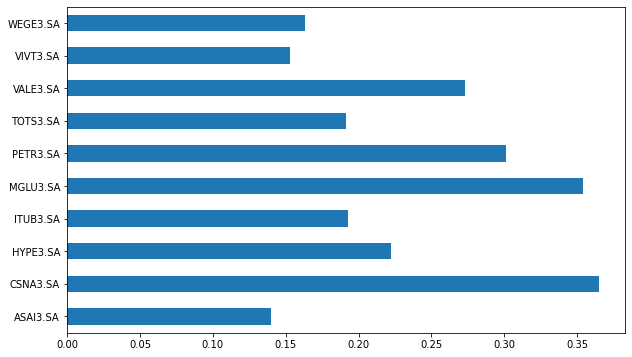

In [10]:
re2.plot.barh(figsize=(10,6));

## Estimando a matriz de covariância

In [11]:
# Esta é a matriz de covariância
from pypfopt import risk_models
from pypfopt import plotting

m_cov = risk_models.sample_cov(preços, frequency=252)
m_cov

,ASAI3.SA,CSNA3.SA,HYPE3.SA,ITUB3.SA,MGLU3.SA,PETR3.SA,TOTS3.SA,VALE3.SA,VIVT3.SA,WEGE3.SA
ASAI3.SA,0.090307,0.028871,0.028927,0.019751,0.057038,0.024867,0.037530,0.009955,0.009593,0.028520
CSNA3.SA,0.028871,0.285224,0.062604,0.061759,0.096692,0.113810,0.042723,0.126426,0.038689,0.037861
HYPE3.SA,0.028927,0.062604,0.141394,0.043623,0.053548,0.059177,0.036976,0.043938,0.022831,0.040515
ITUB3.SA,0.019751,0.061759,0.043623,0.104469,0.050848,0.060795,0.029561,0.043720,0.023152,0.025397
MGLU3.SA,0.057038,0.096692,0.053548,0.050848,0.354202,0.083606,0.054732,0.064542,0.034318,0.049322
PETR3.SA,0.024867,0.113810,0.059177,0.060795,0.083606,0.191730,0.044670,0.094200,0.037423,0.035711
TOTS3.SA,0.037530,0.042723,0.036976,0.029561,0.054732,0.044670,0.134700,0.037093,0.019410,0.033734
VALE3.SA,0.009955,0.126426,0.043938,0.043720,0.064542,0.094200,0.037093,0.167218,0.027317,0.030069
VIVT3.SA,0.009593,0.038689,0.022831,0.023152,0.034318,0.037423,0.019410,0.027317,0.100943,0.013897
WEGE3.SA,0.028520,0.037861,0.040515,0.025397,0.049322,0.035711,0.033734,0.030069,0.013897,0.113395


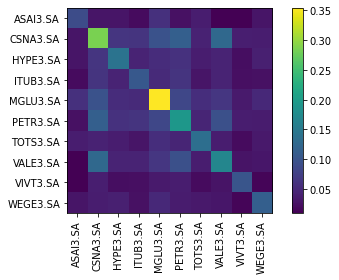

In [12]:
plotting.plot_covariance(m_cov, plot_correlation=False); #false: matriz de correlação; true: matriz de covariância

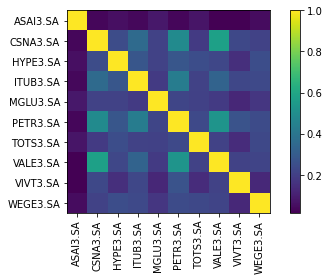

In [13]:
Estimativa_reducao = risk_models.CovarianceShrinkage(preços).ledoit_wolf()
plotting.plot_covariance(Estimativa_reducao, plot_correlation=True);

## Passo 3: A carteira que maximiza o Índice de Sharpe

In [14]:
# Pesos de cada Ativo - para maximizar o Índice de Sharpe
from pypfopt import EfficientFrontier

ef = EfficientFrontier (re2,Estimativa_reducao)
pesos = ef.max_sharpe() #--> como são atribuídos os pesos? Por simulação ou aleatóriamente?
pesos

OrderedDict([('ASAI3.SA', 0.8596564792405647),
             ('CSNA3.SA', 0.0102468004703258),
             ('HYPE3.SA', 0.0327544692672414),
             ('ITUB3.SA', 0.0071083703563492),
             ('MGLU3.SA', 0.0356623300577891),
             ('PETR3.SA', 0.0083265458485504),
             ('TOTS3.SA', 0.0135515165629764),
             ('VALE3.SA', 0.0165184032945145),
             ('VIVT3.SA', 0.0143377149119409),
             ('WEGE3.SA', 0.0018373699897474)])

In [15]:
cleaned_pesos = ef.clean_weights()
ef.save_weights_to_file("pesos.txt")  # saves to file
cleaned_pesos

OrderedDict([('ASAI3.SA', 0.85966),
             ('CSNA3.SA', 0.01025),
             ('HYPE3.SA', 0.03275),
             ('ITUB3.SA', 0.00711),
             ('MGLU3.SA', 0.03566),
             ('PETR3.SA', 0.00833),
             ('TOTS3.SA', 0.01355),
             ('VALE3.SA', 0.01652),
             ('VIVT3.SA', 0.01434),
             ('WEGE3.SA', 0.00184)])

## O desempenho esperado desse portfólio é:

In [16]:
ef.portfolio_performance(verbose=True)

Expected annual return: 15.7%
Annual volatility: 6.7%
Sharpe Ratio: 2.05


(0.15741657122033778, 0.06688545306035155, 2.0545060986033112)

## Passo 4: Gráfico da Fronteira Eficiente e Ponto ótimo

In [17]:
from pypfopt import CLA, plotting

cla = CLA(re2,Estimativa_reducao)
cla.max_sharpe()
cla.portfolio_performance(verbose=True);

Expected annual return: 15.5%
Annual volatility: 6.6%
Sharpe Ratio: 2.05


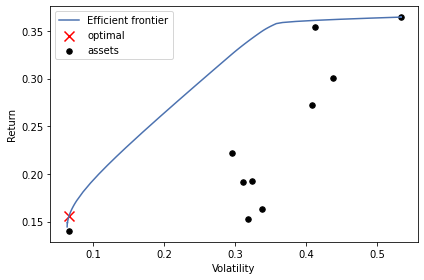

In [18]:
ax = plotting.plot_efficient_frontier(cla, showfig=False)

## Exemplo de Fronteira eficiente excluindo ativos

In [19]:
import cvxpy as cp

re2 = expected_returns.capm_return(preços)
Estimativa_reducao = risk_models.CovarianceShrinkage(preços).ledoit_wolf()

ef = EfficientFrontier(re2,Estimativa_reducao,)
big_tech_indices = [t in {"ASAI3.SA", "VIVT3.SA", "WEGE3.SA"} for t in tickers]
ef.add_constraint(lambda w: cp.sum(w[big_tech_indices]) <= 0.3)

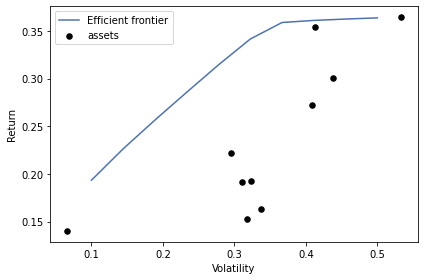

In [20]:
ax = plotting.plot_efficient_frontier(ef, ef_param="risk", 
                                      ef_param_range=np.linspace(0.10, 0.50, 10), #10 Carteiras com risco entre 0,1 e 0,5
                                      showfig=False);

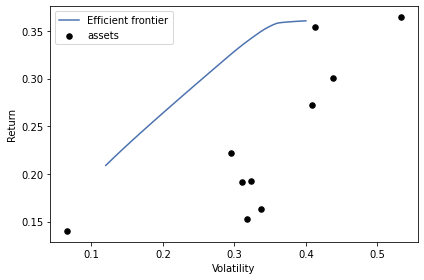

In [21]:
ax = plotting.plot_efficient_frontier(ef, ef_param="risk", 
                                      ef_param_range=np.linspace(0.12, 0.4, 50), #50 Carteiras com risco entre 0,12 e 0.4
                                      showfig=False);

# Passo 5: Contrapondo os métodos
##  Minimizando a volatilidade para um determinado retorno - sugerido por Markowitz

In [22]:
Est_red = risk_models.CovarianceShrinkage(preços).ledoit_wolf()

# You don't have to provide expected returns in this case
ef = EfficientFrontier(None, Est_red, weight_bounds=(None, None))
ef.min_volatility()
pesos_2 = ef.clean_weights()
pesos_2

OrderedDict([('ASAI3.SA', 0.90869),
             ('CSNA3.SA', -0.00619),
             ('HYPE3.SA', 0.01867),
             ('ITUB3.SA', 0.01622),
             ('MGLU3.SA', 0.00104),
             ('PETR3.SA', -0.00491),
             ('TOTS3.SA', 0.01313),
             ('VALE3.SA', 0.01323),
             ('VIVT3.SA', 0.02714),
             ('WEGE3.SA', 0.01297)])

In [23]:
ef.portfolio_performance(verbose=True)

Annual volatility: 6.3%


(None, 0.063400846028458, None)

In [24]:
from pypfopt import CLA, plotting

cla = CLA(re2, Est_red)
cla.max_sharpe()
cla.portfolio_performance(verbose=True);

Expected annual return: 15.5%
Annual volatility: 6.6%
Sharpe Ratio: 2.05
